[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/KNN/K-Nearest%20Neighbors.ipynb)

# K Nearest Neighbors


## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [32]:
url = 'https://raw.githubusercontent.com/akshayrb22/playing-with-data/master/supervised_learning/KNN/Iris.csv'
df = pd.read_csv(url) # Dataset - Breast Cancer Wisconsin Data                                        
df = df.drop(['Id'],axis=1) #Dropping unncessary columns

**Check the head of the dataframe.**

In [60]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(['Species'],axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [37]:
knn = KNeighborsClassifier(n_neighbors = 1)

**Fit this KNN model to the training data.**

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [39]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
print(confusion_matrix(y_test, pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


In [42]:
print(accuracy_score(y_test, pred)*100)

100.0


# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [43]:
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

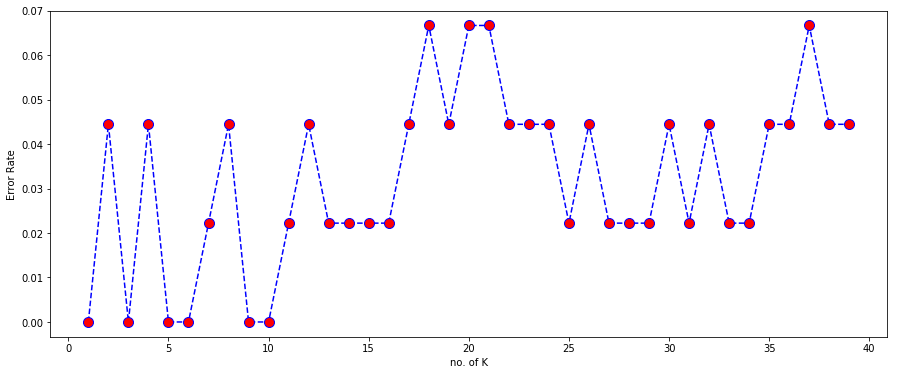

In [44]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [59]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred)*100)

95.55555555555556


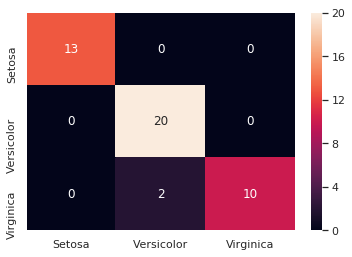

In [58]:
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=['Setosa', 'Versicolor','Virginica'], columns=['Setosa', 'Versicolor','Virginica'])
sns.heatmap(df_cm, annot=True)

# End.